# Ruoff evaluation

- Fig. 3a) plot the fit from the standard single start experiment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pathlib import Path
dir_pipeline = Path(".").resolve().parent
import sys
sys.path.append(str(dir_pipeline))
# import evaluation functions
sys.path.append(str(dir_pipeline / "6_evaluation"))
from helpers_ruoff import (
    load_measurements, 
    load_reference, 
    plot_fit, 
    load_exp_summary, 
    TEST_ENDPOINT,
    TRAINING_ENDPOINT,
    OBSERVABLES_IDS,
    OBSERVED,
)

In [2]:
noise = 5
n_datapoints = 150

# load optimisation results for standard single start
exp_output_path = (Path("results_20241005").resolve() / "t_trainval_for_training")

sim = pd.read_csv(exp_output_path / "prediction_83659.csv")
sim = sim.rename(columns={"time": "Time"})

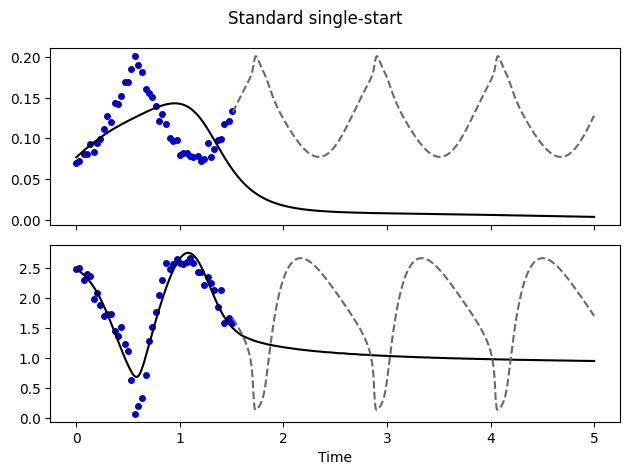

In [3]:
# Plotting routine, adapted from helpers_ruoff.plot_fit

# measurement data: Validation data into training data set
df_data_training = pd.concat(load_measurements(noise, n_datapoints))
t_end = TEST_ENDPOINT
ref = load_reference().query("time > @TRAINING_ENDPOINT")
# plot
fig, axes = plt.subplots(nrows=2, sharex=True)
for ax, observable_id, petab_obs_id in zip(axes, OBSERVED, OBSERVABLES_IDS):
    label = "training"
    df = df_data_training
    color = "mediumblue"
    # measurements
    ax.plot(
        df.query(f"observableId == @petab_obs_id")["time"],
        df.query(f"observableId == @petab_obs_id")["measurement"],
        label=f"{label} data",
        marker="o",
        linestyle="",
        markersize=4,
        color=color,
    )
    # fit
    sim_train_regime = sim[sim["Time"] <= t_end]
    ax.plot(
        sim_train_regime["Time"],
        sim_train_regime[observable_id],
        label="Simulation",
        color="k",
    )
    # true solution for prediction
    ax.plot(
        ref["time"],
        ref[observable_id],
        label="True solution",
        linestyle="dashed",
        color="dimgrey",
    )
    # ax.text(
    #     s=f" ${observable_id}$ ", 
    #     x=0.9, y=0.8, transform=ax.transAxes, 
    #     bbox=dict(boxstyle='square', facecolor="none", edgecolor='tab:orange', linewidth=1.5),
    #     fontsize=14,
    # )

axes[1].set_xlabel("Time")
fig.suptitle("Standard single-start")
fig.tight_layout()
fig.savefig(exp_output_path / "prediction_standard.svg", transparent=True)
